In [79]:
%pylab
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st 

import statsmodels.api as sm

pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.max_columns',1000)
plt.rcParams['figure.figsize'] = (10,6)


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\Gebruiker\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\Gebruiker\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [60]:
Filename = "cities_r2.csv"
df = pd.read_csv(Filename)

In [61]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [62]:
df.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [63]:
df.shape

(493, 22)

## Normality Tests

In [64]:
def Normality(data, name, ddof =1 , assume_discrete = False): 
    IQR = np.percentile(data, 75) - np.percentile(data, 25) 
    bins_width = 2 * IQR * (len(data)**(-1/3)) 
    suggest_bins = np.ceil((data.max() - data.min())/bins_width)
    
    if assume_discrete: 
        bins = arange(data.min(), data.max() + 2) - 0.5
        freq, bins, _ = plt.hist(data, bins = bins, normed = True , alpha=0.6) 
    else: 
        freq, bins, _ = plt.hist(data, bins= suggest_bins, normed = True, alpha = 0.6)
    X = st.norm(mean(data) , std(data, ddof = ddof))
    x1 = (bins[1:] + bins[:-1])/2
    y1 = X.pdf(x1) 
    plt.plot(x1,y1,color='red', marker = 'o')
    plt.title("Histogram")
    plt.xlabel(name) 
    plt.ylabel("Freq")
    plt.show() 
    
    x2 = sort(data) 
    probs = linspace(1, len(x2) , num = len(x2))/len(x2) 
    y2 = X.ppf(probs) 
    plt.plot(x2[:-1],y2[:-1],'o', color = 'blue') 
    plt.plot([x2.min() , x2.max()],[x2.min() , x2.max()],color= 'yellow',linewidth = 2) 
    plt.title("Line plot") 
    plt.xlabel(name) 
    plt.show() 
    
    print("Empirical Rule:") 
    x_bar, x_s = mean(data) , std(data, ddof = ddof) 
    for i in range(1,4): 
        within_std = np.sum(np.abs(data - x_bar) < i * x_s)
        print("Data within {} std: {:.2f}%".format(i, within_std/data.size * 100))

In [65]:
x  = df['effective_literacy_rate_total'].values

C:\Users\Gebruiker\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Gebruiker\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


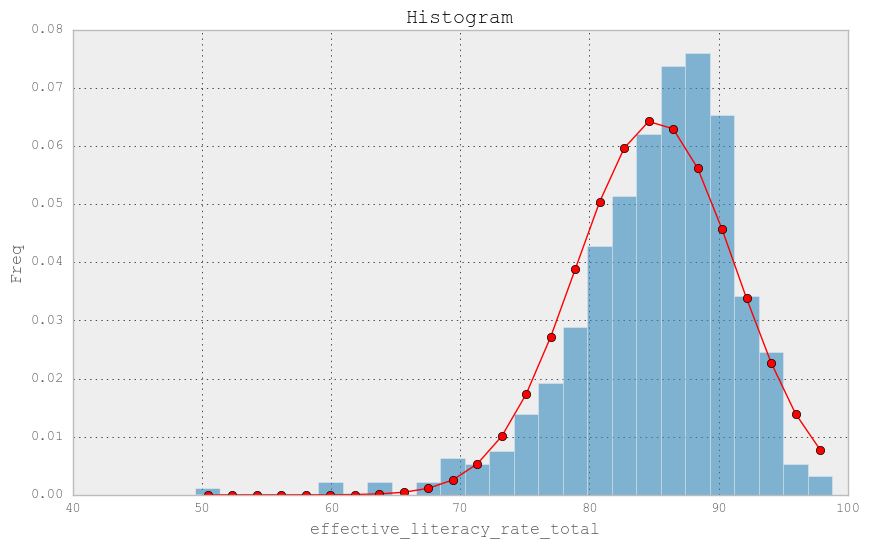

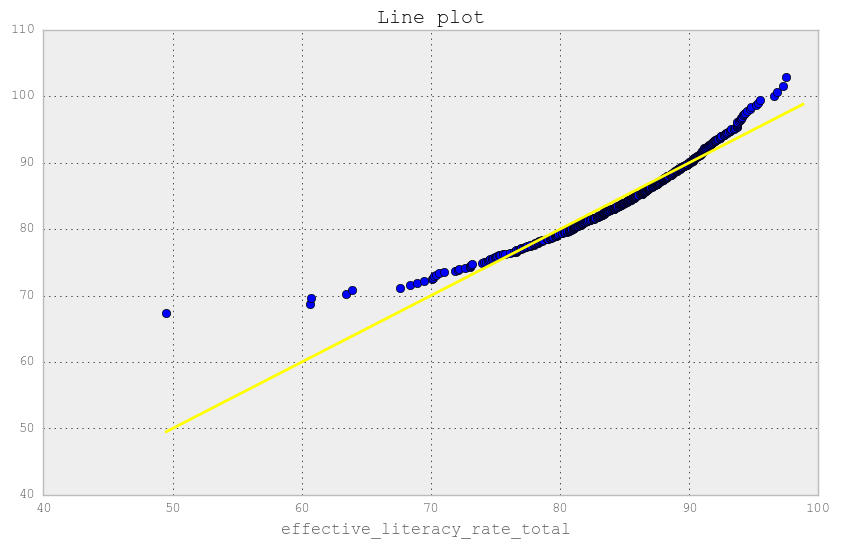

Empirical Rule:
Data within 1 std: 73.63%
Data within 2 std: 95.94%
Data within 3 std: 98.99%


In [80]:
Normality(x,'effective_literacy_rate_total ')

In [67]:
y = df['sex_ratio'].values

C:\Users\Gebruiker\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Gebruiker\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


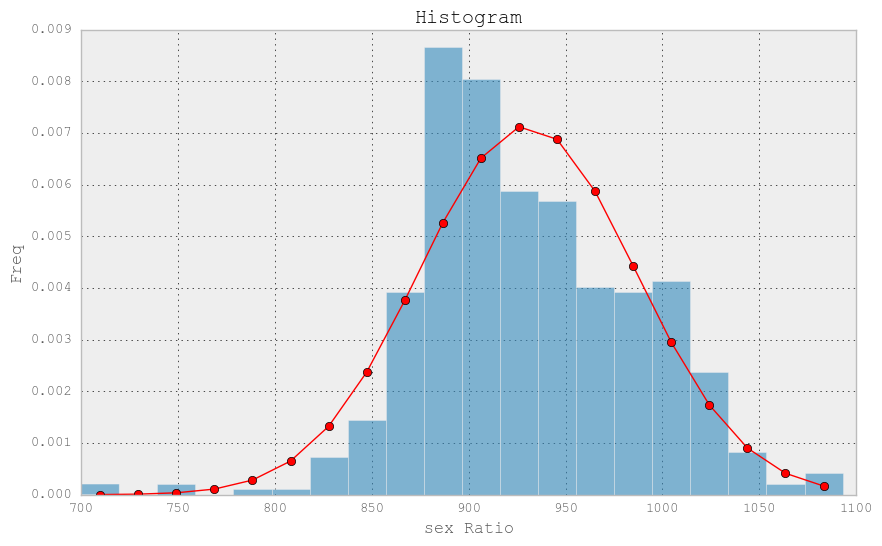

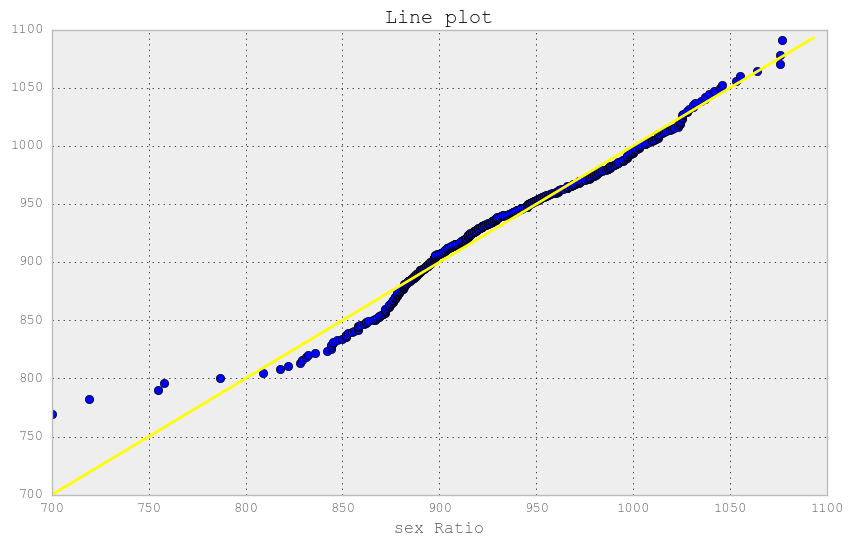

Empirical Rule:
Data within 1 std: 69.57%
Data within 2 std: 96.55%
Data within 3 std: 99.19%


In [81]:
Normality(y, 'sex Ratio')

## Linear Regression 

In [69]:
x  = df['effective_literacy_rate_total'].values
X = sm.add_constant(x)
#Use X for determining coefficients and predicted values



y = df['sex_ratio'].values

In [70]:
def fitted_model(X,y): 
    fitted_model = sm.OLS(y,X) 
    return fitted_model.fit() 

def coeff(X,y): 
    coeff = fitted_model(X,y).params
    return np.array(coeff)
    
def prediction(X,y): 
    n = len(X)
    predictions = fitted_model(X,y).predict(X) 
    return np.array(predictions.reshape(n,1))

Linear regression line 

In [71]:
print("y= {:.3f} + {:.3f}x".format(coeff(X,y)[0] , coeff(X,y)[1]))

y= 733.708 + 2.309x


Prediction

In [72]:
prediction(X,y)[:10]

array([[ 918.12120978],
       [ 946.13192407],
       [ 919.62219612],
       [ 926.43436489],
       [ 891.61148183],
       [ 950.4963305 ],
       [ 880.20398566],
       [ 940.65909695],
       [ 944.97731919],
       [ 961.85764247]])

## Correlation coefficient 

In [86]:
def cov(x,y,bias=0): 
    n = float(len(x))
    return np.sum((x - np.mean(x)) * (y - np.mean(y)))/(n - min(bias,1))

def z_score(x):
    return (x-np.mean(x))/np.std(x)

def correlation(x,y,bias = 0): 
    return cov(z_score(x),z_score(y),bias)

In [87]:
print("Correlation coefficient = {:.3f}".format(correlation(x,y)))

Correlation coefficient = 0.256


## Determination Coefficient

In [75]:
def R_squared(x,y):
    n = len(x)
    X = np.mat([np.ones(n), x]).T
    Y = np.mat(y).T
    M = X.T * X

    coef1 = M.I * (X.T * Y)

    YR = X * coef1
    Ygem = Y.mean()

    SSE = np.dot((Y - YR).T, Y - YR)
    SSY = np.dot((Y - Ygem).T, Y - Ygem)
    SST = np.dot((YR - Ygem).T, YR - Ygem)

    Rkwadraat = 1 - SSE / SSY
    return(Rkwadraat[0,0])

In [76]:
print("Determination coefficient = {:.4f}".format(R_squared(x,y)))

Determination coefficient = 0.0654


## P-value

In [99]:

def p_value(X,y):
    n = len(X) 
    R  = st.rdist(n - 2) 
    pvalue = 2*(1 - R.cdf(abs(correlation(x,y))))
    return pvalue

In [103]:
print("pvalue = {:.10f} ".format(p_value(X,y)))

pvalue = 0.0000000084 


## Regression plot

In [82]:
def regression_plot(dataset,xname,yname,fitted_values): 
    x_range = [dataset[xname].min(), dataset[xname].max()]
    y_range = [dataset[yname].min(), dataset[yname].max()]
    
    scatter_plot = dataset.plot(kind='scatter', x = xname, y = yname, xlim=x_range,ylim=y_range, linewidth=10)
    
    y_hat = scatter_plot.plot(x_range,[dataset[yname].mean(), dataset[yname].mean()],'--', color='red', linewidth=1.5)
    x_hat = scatter_plot.plot([dataset[xname].mean(),dataset[xname].mean()],y_range, '--', color= 'red', linewidth=1.5) 
    
    regression_line = scatter_plot.plot(dataset[xname],fitted_values,color='yellow', linewidth=1.5)
    plt.title('Regression of {} and {}'.format(xname,yname))
    plt.show()

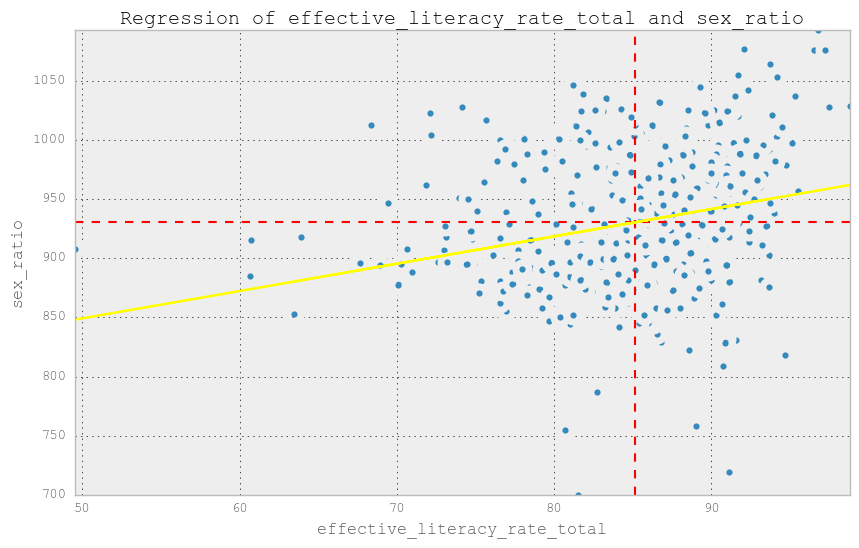

In [83]:
regression_plot(df,'effective_literacy_rate_total','sex_ratio',prediction(X,y) )

In [104]:
print("Correlation coefficient = {:.3f}".format(correlation(x,y)))
print("Coefficient of determination = {:.3f}".format(R_squared(x,y)))
print("pvalue = {:.10f} ".format(p_value(X,y)))

Correlation coefficient = 0.256
Coefficient of determination = 0.065
pvalue = 0.0000000084 


## Conclusion


With n = 493 observations, the correlationcoefficient r = 0.256 with p-value = 0.0000000084. Effective literacy rate total and sex ratio correlate with each-other if assumed that 6.54% of the sex ratio are linearly dependent with Effective literacy rate total.